# Convolution
In this notebook, we demonstrate the concept of convolution and how it is used to do filtering. This notebook is adapted from the [Jupyter Widgets Scipy 2014 Tutorial for convolution](https://tonysyu.github.io/ipython-jupyter-widgets-an-image-convolution-demo.html).

We need some helper functions to pad the image we are going to do the convolution on and get image pixels of the image. We don't need to understand these functions, just remember what they do

In [72]:
import numpy as np

def padding_for_kernel(kernel):
    """ Return the amount of padding needed for each side of an image.

    For example, if the returned result is [1, 2], then this means an
    image should be padded with 1 extra row on top and bottom, and 2
    extra columns on the left and right.
    """
    # Slice to ignore RGB channels if they exist.
    image_shape = kernel.shape[:2]
    # We only handle kernels with odd dimensions so make sure that's true.
    # (The "center" pixel of an even number of pixels is arbitrary.)
    assert all((size % 2) == 1 for size in image_shape)
    return [(size - 1) // 2 for size in image_shape]

def add_padding(image, kernel):
    '''
    Add the appropriate padding (+ one extra) to an image given the kernel/template
    '''
    h_pad, w_pad = padding_for_kernel(kernel)
    return np.pad(image, ((h_pad, h_pad), (w_pad, w_pad)), 
                  mode='constant', constant_values=0)

def window_slice(center, kernel):
    '''
    Get the patch shape given the center and kernel/template size
    '''
    r, c = center
    r_pad, c_pad = padding_for_kernel(kernel)
    # Slicing is (inclusive, exclusive) so add 1 to the stop value
    return [slice(r-r_pad, r+r_pad+1), slice(c-c_pad, c+c_pad+1)]

def apply_kernel(center, kernel, original_image):
    '''
    Extract the patch at center and compute the inner product
    '''
    #print(window_slice(center, kernel))
    image_patch = original_image[window_slice(center, kernel)]
    #print("Image Patch Shape:",image_patch.shape)
    # An element-wise multiplication followed by the sum
    return np.sum(kernel * image_patch)

Let's create/load an image and a kernel, then apply the convolution

In [73]:
#N = 10
#image = np.ones((N, N), np.float32)
##load cameraman image
from skimage import data
image = data.camera()

#Define kernel
n = 5
kernel = np.ones((n, n), np.float32)
#Laplacian operator
#kernel = np.array([[0,1,0], 
#                  [1,2,1], 
#                  [0,1,0]])
#sobel
#kernel = np.array([[-1,0,1], 
#                  [-2,0,2], 
#                  [-1,0,1]])
#normalise kernel
kernel /= np.sum(kernel)
print(kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


In [74]:
#pad the image first
i_pad, j_pad = padding_for_kernel(kernel) #get how much padding will be applied
print("Padding:", (i_pad, j_pad))
paddedImage = add_padding(image, kernel) #apply the actual padding
print("Padded Image Shape:",paddedImage.shape)
#print(paddedImage)

filtered = np.zeros_like(paddedImage)
for xIndex, row in enumerate(image): #for every row
    for yIndex, column in enumerate(row): #for every column in row
        # Shift the center of the kernel to ignore padded border.
        i = xIndex + i_pad
        j = yIndex + j_pad
        center = (i, j)
        #print("center:", center)
        # Modify the pixel value at the kernel center by applying the kernel
        filtered[center] = apply_kernel(center, kernel, paddedImage)
        
print("Filtered Image:\n", filtered)

Padding: (2, 2)
Padded Image Shape: (516, 516)
Filtered Image:
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 56 ... 54  0  0]
 ...
 [ 0  0 44 ... 41  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


Note for a convolution we need to flip the kernel horizontally and vertically, otherwise it is a cross correlation. But since our kernel is symmetric there is no difference.

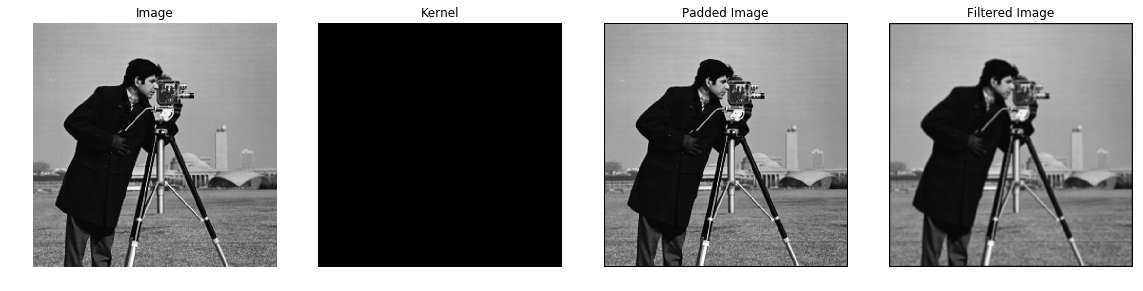

In [75]:
#plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 10))

plt.gray()
plt.tight_layout()

ax[0].imshow(image, interpolation="nearest")
ax[0].axis('off')
ax[0].set_title('Image')
ax[1].imshow(kernel, interpolation="nearest")
ax[1].axis('off')
ax[1].set_title('Kernel')
ax[2].imshow(paddedImage, interpolation="nearest")
ax[2].axis('off')
ax[2].set_title('Padded Image')
ax[3].imshow(filtered, interpolation="nearest")
ax[3].axis('off')
ax[3].set_title('Filtered Image')

plt.show()

Notice how the kernel as affected the image depending on your kernel.